In [12]:
%load_ext sql

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import peakutils
import pandas as pd

from scipy import signal 
%matplotlib notebook
%sql sqlite:///schema/test.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [57]:
# Load test data (RCH90b)
cur_experiment_id = 1
result = %sql select data from mic where experiment_id = :cur_experiment_id

mic_1 = np.array(result[0][0])
mic_2 = np.array(result[1][0])
mic_3 = np.array(result[2][0])

# Median filter the data
mic_1 = mov_median(mic_1, 51)
mic_2 = mov_median(mic_2, 51)
mic_3 = mov_median(mic_3, 51)

Done.


<IPython.core.display.Javascript object>


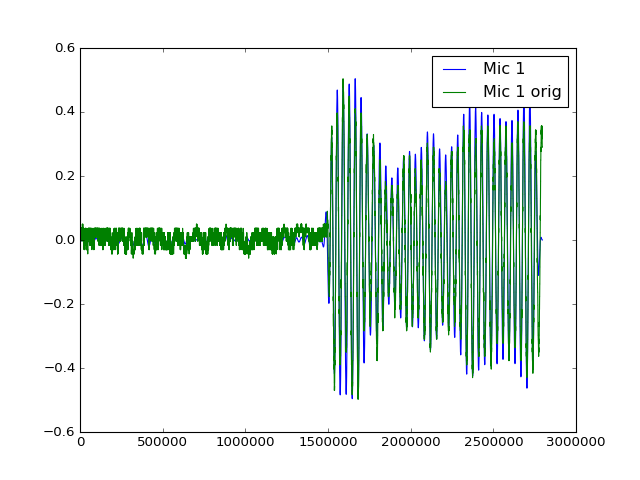

In [58]:
%matplotlib notebook
plt.figure(1)
plt.plot(normalize_signal(apply_butter(FREQ_1, FREQ_2, SAMPLING_FREQ, mic_1)), label='Mic 1', lw=1)
plt.plot(normalize_signal(mic_1), label='Mic 1 orig', lw=1)
#plt.plot(mic_2, label='Mic 2', lw=1)
#plt.plot(mic_3, label='Mic 3', lw=1)
plt.legend()
plt.show()

In [45]:
sig_butter = normalize_signal(apply_butter(FREQ_1, FREQ_2, SAMPLING_FREQ, mic_1))
peakutils.peak.indexes(sig_butter, thres=0.6, min_dist=1000)

array([1451351, 1486837, 1522056, 1557279, 1592697, 1628321, 1664127,
       1700176, 1736772, 1774164, 1811781, 1848850, 1885436, 1921639,
       1957580, 1993415, 2029286, 2065326, 2101586, 2138062, 2174752,
       2211545, 2248224, 2284685, 2320942, 2357117, 2393399, 2429947,
       2466784, 2503651, 2540273, 2576598, 2612666, 2648482, 2684042,
       2719286])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(1521943, 1664524)
(1522021, 1664440)


<IPython.core.display.Javascript object>


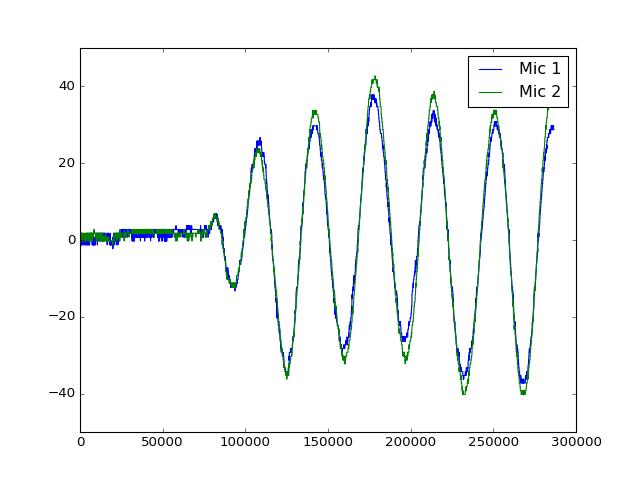

offset2 - offset1: 78

xcorr: 192

gcc-phat: 68



In [75]:
%load_ext autoreload
%autoreload 2
from locate import *

sig1 = mic_1
sig2 = mic_2 

n = 5
sig1 = sig1 - np.mean(sig1)
sig2 = sig2 - np.mean(sig2)

# Crop each signal about peaks
sig1_cropped, _ , offset1, pk1_locs = find_peak_window(sig1, thres=0.6, min_dist=1000, n=n)
sig2_cropped, _ , offset2, pk2_locs = find_peak_window(sig2, thres=0.3, min_dist=1000,
                                                           n=None, closest_to=pk1_locs)
%matplotlib notebook
plt.figure(1)
plt.plot(sig1_cropped, label='Mic 1', lw=1)
plt.plot(sig2_cropped, label='Mic 2', lw=1)
plt.legend()
plt.show()

print("offset2 - offset1: %d\n" % (offset2 - offset1))
_, val = xcorr(sig1_cropped, sig2_cropped)
print "xcorr: %r\n" % (val + (offset2 - offset1))
fs = 9.5e6
corr, ind = gcc_xcorr(sig1_cropped, sig2_cropped, 200, 350, fs)
samples = np.arange(len(corr)) - len(corr)/2
val = -samples[ind]
print "gcc-phat: %r\n" % (val + (offset2 - offset1))
